基础优化方法
1.梯度下降：初始值 W,学习率（不能太大或太小）
小批量梯度下降：批量大小、学习率

线性回归从零实现

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    """生成y = Wx + b + 噪声"""
    X=torch.normal(0,1,(num_examples,len(w)),dtype=torch.float32)
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4],dtype=torch.float32)
true_b=4.2
features,lables = synthetic_data(true_w,true_b,1000)
len(true_w)
#print(features)
#print(lables)

2

In [4]:
print(features[0])
print(lables[0])

tensor([-0.2558,  1.0014])
tensor([0.2809])


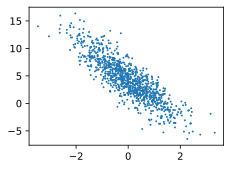

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                lables.detach().numpy(),1)

In [6]:
def data_iter(batch_size,features,lables):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],lables[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,lables):
    print(X,'\n',y)
    break

tensor([[ 0.1450, -1.7924],
        [ 0.3640,  1.9183],
        [ 0.4094, -0.1148],
        [ 1.9920, -0.9701],
        [ 0.0456,  1.6015],
        [-0.6531, -0.7402],
        [-1.4653, -0.6812],
        [-0.5030,  0.2507],
        [-0.5966,  0.6022],
        [-0.4838, -2.0692]]) 
 tensor([[10.5867],
        [-1.5896],
        [ 5.4221],
        [11.4824],
        [-1.1450],
        [ 5.4210],
        [ 3.5937],
        [ 2.3307],
        [ 0.9661],
        [10.2452]])


In [7]:
#定义 初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [8]:
#定义模型
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [9]:
#定义损失函数
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [10]:
#定义优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [11]:
#训练过程
lr = 0.01
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,lables):
        l = loss(net(X,w,b),y)#X和y的小批量损失
        #因为1形状是（batch_size，1）而不是一个标量
        #并以此计算关于【w，b】的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),lables)
        print(f'epoch{epoch + 1},loss {float(train_l.mean()):f}')

epoch1,loss 2.206676
epoch2,loss 0.290308
epoch3,loss 0.038302


In [12]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([ 0.0929, -0.1803], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.1874], grad_fn=<RsubBackward1>)
